# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
cities

In [3]:
#url for requests to retrieve data
url = "http://api.openweathermap.org/data/2.5/weather?q="

city_api_response_list = []
# counter = 0

#for loop to fill city api response list
for city in cities:
    query_url = url + city + "&appid=" + weather_api_key
    
    try :
        time.sleep(1)
        response = requests.get(query_url).json()
#         counter += 1
    

    
        city_api_response_list.append({
                                   "City": city, 
                                   "Lat": response["coord"]["lat"],
                                   "Lon": response["coord"]["lon"],
                                   "Max Temp": response["main"]["temp_max"],
                                   "Humidity": response["main"]["humidity"],
                                   "Cloudiness": response["clouds"]["all"],
                                   "Windspeed": response["wind"]["speed"],
                                   "Country": response["sys"]["country"],
                                   "Date": response["dt"]
                                  })
    
    
#         if counter == 3 :
#             break
       
    except KeyError :
        print(f"No data found: {city}")
    
       
        

# print(city_api_response_list)
# # print(response)




No data found: inderborskiy
No data found: sentyabrskiy
No data found: nizhneyansk
No data found: yanan
No data found: tsihombe
No data found: sorvag
No data found: taolanaro
No data found: quetzaltepec
No data found: belushya guba
No data found: grand river south east
No data found: barentsburg
No data found: mys shmidta
No data found: saleaula
No data found: dien bien
No data found: igarape-miri
No data found: tawnat
No data found: marcona
No data found: vaitupu
No data found: tidore
No data found: katsiveli
No data found: illoqqortoormiut
No data found: ngukurr
No data found: kebemer
No data found: skagastrond
No data found: samusu
No data found: umzimvubu
No data found: agva
No data found: tumannyy
No data found: chagda
No data found: malwan
No data found: kamenskoye
No data found: naftah
No data found: temaraia
No data found: yuzhno-yeniseyskiy
No data found: attawapiskat
No data found: samalaeulu
No data found: palabuhanratu
No data found: kesennuma
No data found: tarudant
No dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_cities_df = pd.DataFrame(columns=['City', 'Lat', 'Lon', 'Max Temp', 'Humidity', 'Cloudiness', 'Windspeed',
                                "Country", "Date"])
weather_cities_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date


In [5]:
for dictionary in city_api_response_list :
    weather_cities_df = weather_cities_df.append(dictionary, ignore_index = True)
    
    
weather_cities_df.head()  

weather_cities_df.to_csv(output_data_file)



In [6]:
weather_cities_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,honningsvag,70.98,25.97,286.41,86,0,7.70,NO,1595644359
1,grand-lahou,5.14,-5.02,296.56,90,77,4.36,CI,1595644360
2,ende,-8.84,121.66,300.51,54,86,3.25,ID,1595644361
3,esperance,-33.87,121.90,283.15,87,78,10.30,AU,1595644362
4,hobart,-42.88,147.33,285.93,57,75,4.60,AU,1595644202


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_cities_humidity_df = weather_cities_df[["City", "Humidity"]]
weather_cities_humidity_df.head()

,City,Humidity
0,honningsvag,86
1,grand-lahou,90
2,ende,54
3,esperance,87
4,hobart,57


In [11]:
weather_cities_humidity_df.loc.[weather_cities_humidity_df['Humidity'] > 100]

,City,Humidity


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [13]:
lat_vs_temp_df = weather_cities_df[["Lat", "Max Temp"]
lat_vs_temp_df.head()

,Lat,Max Temp
0,70.98,286.41
1,5.14,296.56
2,-8.84,300.51
3,-33.87,283.15
4,-42.88,285.93


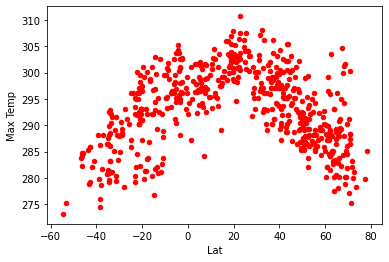

In [18]:
lat_vs_temp_plot = weather_cities_df.plot.scatter(x = "Lat", y = "Max Temp", c= "red")


## Latitude vs. Humidity Plot

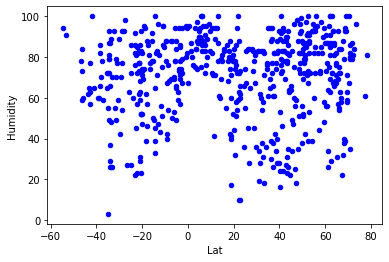

In [19]:
lat_vs_humidity_plot = weather_cities_df.plot.scatter(x = "Lat", y = "Humidity", c= "blue")

## Latitude vs. Cloudiness Plot

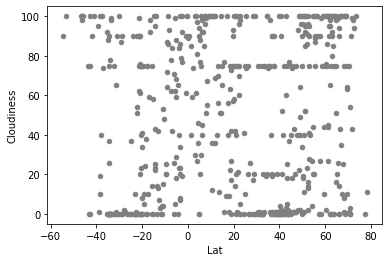

In [20]:
lat_vs_clouds_plot = weather_cities_df.plot.scatter(x = "Lat", y = "Cloudiness", c= "grey")

## Latitude vs. Wind Speed Plot

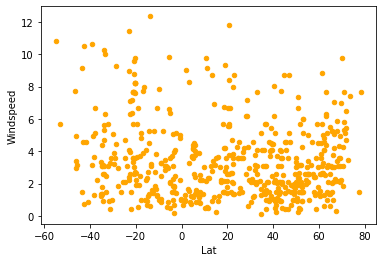

In [21]:
lat_vs_wind_plot = weather_cities_df.plot.scatter(x = "Lat", y = "Windspeed", c= "orange")

## Linear Regression

In [55]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_func(x, y, color) :
    plot = plt.scatter(x, y, c= color)
    
    (slope, intercept, rvalue, pvalue, stderr) =  linregress(x, y)

    regress_values = (x * slope) + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.plot(x, regress_values, "b-")
    plt.annotate(line_eq, (min(x)+5, min(y)+5), fontsize=15, color="black")
    
    plt.show()

In [62]:
# Create Northern and Southern Hemisphere DataFrames


northern_hem_df = weather_cities_df.loc[weather_cities_df["Lat"] > 0 ]
southern_hem_df = weather_cities_df.loc[weather_cities_df["Lat"] <= 0 ]

northern_hem_df = northern_hem_df.astype({"Humidity" : 'int64', "Cloudiness" : "int64"})

southern_hem_df = southern_hem_df.astype({"Humidity" : 'int64', "Cloudiness" : "int64"})

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

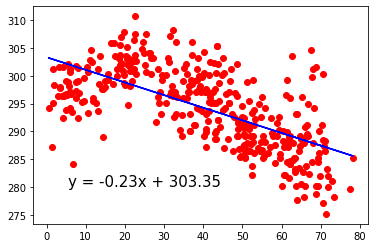

In [63]:
regression_func(northern_hem_df["Lat"], northern_hem_df["Max Temp"], "red")
# northern_hem_df.dtypes

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

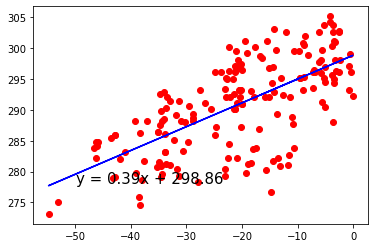

In [64]:
regression_func(southern_hem_df["Lat"], southern_hem_df["Max Temp"], "red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

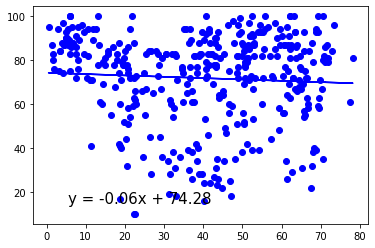

In [65]:
regression_func(northern_hem_df["Lat"], northern_hem_df["Humidity"], "blue")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

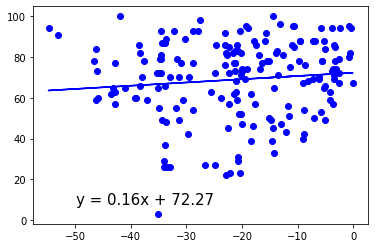

In [66]:
regression_func(southern_hem_df["Lat"], southern_hem_df["Humidity"], "blue")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression